In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

food_consumption = pd.read_csv('food_consumption.csv', index_col=0)
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [3]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'mean', 'std']))

                        var        mean         std
food_category                                      
beef           88748.408132  374.102000  297.906710
dairy          17671.891985  179.153846  132.935669
eggs              21.371819    7.499615    4.622966
fish             921.637349   27.601692   30.358481
lamb_goat      16475.518363   91.056769  128.356996
nuts              35.639652    7.323000    5.969895
pork            3094.963537   57.070077   55.632396
poultry          245.026801   22.793538   15.653332
rice            2281.376243   37.591615   47.763754
soybeans           0.879882    0.387308    0.938020
wheat             71.023937   13.644462    8.427570


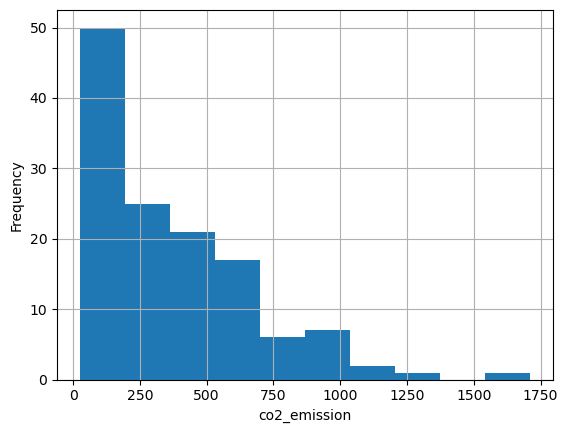

In [4]:
# Create historgram of co2_emission for each food_category
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
plt.xlabel('co2_emission')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Calculate the quartiles of co2_emission
np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1])

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [8]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, num =11, endpoint=True )))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


In [11]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

emissions_by_country.head()

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
Name: co2_emission, dtype: float64

In [15]:
# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [26]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
outliers

country
Argentina    2172.4
Name: co2_emission, dtype: float64